# 알집 풀기

In [8]:
from zipfile import ZipFile

with ZipFile("train_data.zip", 'r') as zip:
    zip.extractall("train")

In [9]:
with ZipFile("test_data.zip", "r") as zip:
    zip.extractall("test")

# 데이터 불러오기

In [10]:
import os
import glob

train_dir = os.getenv("HOME") + "/aiffel/aiffel_project/writing_model/train/train_data/*"
train_list = glob.glob(train_dir)

print(train_list[:10])

['/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_░φ╡ε_1╟╨│Γ_ESSAY_66134.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_┴▀╡ε_1╟╨│Γ_ESSAY_42019.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_82321.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_81079.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_░φ╡ε_3╟╨│Γ_ESSAY_38369.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_82280.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_░φ╡ε_2╟╨│Γ_ESSAY_57465.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_┴▀╡ε_1╟╨│Γ_ESSAY_37286.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_┴▀╡ε_1╟╨│Γ_ESSAY_75841.json', '/aiffel/aiffel/aiffel_project/writing_model/train/train_data/▒█┴■▒Γ_░φ╡ε_3╟╨│Γ_ESSAY_37538.json']


In [13]:
test_dir = os.getenv("HOME") + "/aiffel/aiffel_project/writing_model/test/test_data/*"
test_list = glob.glob(test_dir)

print(test_list[:10])

['/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_░φ╡ε_2╟╨│Γ_ESSAY_79392.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_░φ╡ε_3╟╨│Γ_ESSAY_37698.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_82398.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_68003.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_82335.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_░φ╡ε_2╟╨│Γ_ESSAY_87205.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_░φ╡ε_2╟╨│Γ_ESSAY_77725.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_░φ╡ε_3╟╨│Γ_ESSAY_44770.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_┴▀╡ε_2╟╨│Γ_ESSAY_82399.json', '/aiffel/aiffel/aiffel_project/writing_model/test/test_data/▒█┴■▒Γ_░φ╡ε_1╟╨│Γ_ESSAY_75429.json']


# 데이터 전처리

In [12]:
import json

corpus = []

for file in train_list:
    with open(file, 'r') as f:
        json_file = json.load(f)
        only_txt = json_file['essay_txt']
        only_txt = only_txt.replace("#@문장구분#", "")
        only_txt = only_txt.replace("\n", "")
        only_txt = only_txt.replace("\b", "")
        corpus.append(only_txt)
        
print(corpus[:3])

['우리는 살면서 아주 당연하게 생각하고 있는 것들이 있습니다. 그러나 당연하다고 여겼던 것이 알고 보니 정말이지 소중하고 중요한 존재였다는 것을 뒤늦게 깨닫곤 합니다. 소중한 것은 너무나도 많지만 그 중 한 가지 예는 바로 병원에서 볼수 있습니다. 바로, 사람의 건강이라고 할 수 있겠습니다. 건강 할 때에는 건강의 소중함에 대해 알지 못합니다. 당연히 누려야 할 권리라고 생각합니다. 그런데 어느 날 허리라도 아픈 상황이 찾아온다면? 의자에 앉아 있는 것도 곤욕이고 서서 어딘가 움직이는 것도 힘들 수 있습니다. 하루 종일 누워서 생활하다 보면 비로소 건강이 얼마나 중요한지 깨달을 수 있습니다. 우리는 건강의 소중함에 대해 뼈저리게 느끼는 일이 평소에 없습니다. 건강할 때 건강을 챙기는 현명한 모습을 보였으면 합니다. 건강을 챙긴다는 것에 의미는 두 가지가 있을 것입니다. 하나는 애초에 문제가 생기지 않게 잘하는 것이고 또 하나는 문제가 생기게 되었을 때, 더 큰 문제로 번지지 않게 빠르게 진압하는 것입니다. 노화는 자연스러운 현상이므로 배제하고, 모두가 공평한 상황에서 갑작스럽게 건강에 찾아올 수 있는 위기 상황으로는 교통사고가 대표적일 것입니다. 갑자기 사고라도 당하게 되면 우리의 건강은 크게 흔들릴 것입니다. 말 그대로 갑작스럽게 건강에 적신호가 켜지는 것입니다. 당장에는 별 문제 없다가 서서히 나타나 점점 심해지는 경우도 있습니다. 건강이 우리의 가장 소중한 것입니다. 그래야 소중한 것을 잃지 않습니다.', '미래의 도시에는 차가 날아다닐 것이고, 그때쯤으면 다른나라를 갔다오는데만 시간이 별로 안 걸릴 수도 있다. 또한 TV나 컴퓨터도 오직 터치만으로 떴다가 사라지는 홀로그램 기술이 생길 수도 있을 것 같다. 우주 사업도 진행되어 우주를 왕복선을 타고 여행이 가능할 수도 있을 것이다. 그때는 힘든 일은 로봇이 대체할 수도 있고 로봇이 대중화되어 사람들이 모르는 길이나 장소 등을 찾아주는 역할도 가능할 것이다. 하지만 환경이 오염되어 미세먼지가 극도로 심해

In [6]:
train_data = ' '.join(map(str, corpus))
print(train_data[:100])

우리는 살면서 아주 당연하게 생각하고 있는 것들이 있습니다. 그러나 당연하다고 여겼던 것이 알고 보니 정말이지 소중하고 중요한 존재였다는 것을 뒤늦게 깨닫곤 합니다. 소중한 것은 


In [15]:
corpus = []

for file in test_list:
    with open(file, 'r') as f:
        json_file = json.load(f)
        only_txt = json_file["essay_txt"]
        only_txt = only_txt.replace("#@문장구분#", "")
        only_txt = only_txt.replace("\n", "")
        only_txt = only_txt.replace("\b", "")
        corpus.append(only_txt)
        
print(corpus[0])

위성 인터넷으로 전세계를 연결하겠다는 일론 머스크 테슬라 창업자의 '스타링크' 프로젝트에 대한 반발이 나날이 확산되고 있는 추세이다. 소유권이 없고, 특별한 규제도 없는 우주 공간을 개인이 선점하고 사업에 활용하도록 방치해서는 안된다는 것이다. 요제프 아슈바허 유럽우주국 사무총장은 영국 파이낸셜타임스 인터뷰에서 다음과 같은 인터뷰를 하였다. "전세계 위성의 절반을 머스크라는 한 사람이 차지하고 있다"면서 "머스크가 우주 경제를 지배하는 것을 막기 위해 규제를 도입해야 한다"고 말했다. 머스크가 세운 민간우주회사 스페이스X는 4만개 이상의 위성을 지구 저궤도에 쏘아올려 전세계 어디에서나 기지국 없이 인터넷을 서비스하는 스타링크 사업을 진행하고 있다. 이미 2000대의 위성을 쏘아올렸고 지난해부터 상용 서비스도 시작했다. 하지만 스페이스X가 한정된 지구 궤도에 지나치게 많은 위성을 쏘아 올리면서 공간을 선점하고 있는 데에다, 다른 위성과의 충돌 위험도 높아졌다는 불만이 높아지고 있다. 프란츠 파이요 룩셈부르크 경제장관은 지난달 열린 뉴스페이스 컨퍼런스에서 "우주에는 새 규제가 필수적"이라며 "우주의  식민지화를 막아야 한다"고 했다. 과학자들도 비판에 동참했다. 영국 왕립천문학회는 지난 12월 2일 "스페이스X가 소형 인공위성을 대량으로 쏘아 올리면서 광공해가 생겨, 천체를 분별하기 어려워졌다"면서 "위성이 전파를 방해해 우주 관측에 악영향을 끼칠 수 있다"고 지적했다. 그의 이상과 그걸 행동하는 행동력은 항상 박수를 쳐주고 싶을 정도이다. 실제로 국제 사회에 중요한 역할을 맡고 있다고 생각하기 때문인데, 하지만 그도 이렇게 영향력있는 인물이 된 만큼 나무만을 볼 것이 아닌 숲을 봐야 할 시기가 되었다고 생각하는 바이며 많은 사람들이 우려하고 있는 부분을 놓쳐서는 안 된다고 생각한다.


In [16]:
test_data = ' '.join(map(str, corpus))
print(test_data[:100])

위성 인터넷으로 전세계를 연결하겠다는 일론 머스크 테슬라 창업자의 '스타링크' 프로젝트에 대한 반발이 나날이 확산되고 있는 추세이다. 소유권이 없고, 특별한 규제도 없는 우주 공간


# 프리트레인 모델 불러오기

In [17]:
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                   bos_token="</s>",
                                                   eos_token="</s>",
                                                   unk_token="<unk>",
                                                   pad_token="<pad>",
                                                   mask_token="<mask>")

model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/opt/conda/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:660: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Downloading:   0%|          | 0.00/490M [00:00<?, ?B/s]

# 토큰화 작업

In [19]:
!pip install fastai

In [20]:
from fastai.text.all import *

In [21]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
    def encodes(self, x):
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [22]:
splits = [[0], [1]]

tls = TfmdLists([train_data, test_data], TransformersTokenizer(tokenizer),
               splits=splits, dl_type=LMDataLoader)
batch, seq_len = 8, 256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

# 모델 훈련

SuggestedLRs(valley=8.31763736641733e-06)


epoch,train_loss,valid_loss,perplexity,time
0,5.894165,5.845465,345.663300,02:57


epoch,train_loss,valid_loss,perplexity,time
0,4.459512,5.275143,195.418442,02:57
1,4.067909,5.327661,205.955582,02:58
2,3.193383,5.396924,220.726425,02:58
3,2.172849,5.460690,235.259583,02:58
4,1.458596,5.417713,225.363052,02:59


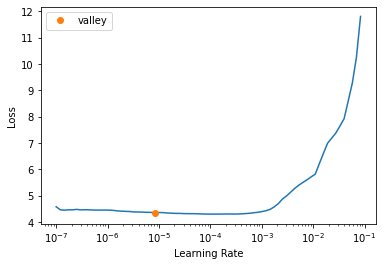

In [24]:
class DropOutput(Callback):
    def after_pred(self):
        self.learn.pred = self.pred[0]
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
                cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr = learn.lr_find()
print(lr)
learn.fine_tune(5)

In [25]:
prompt="우리는 살면서 아주 당연하게 생각하고 있는 것들이 있습니다."
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())

'우리는 살면서 아주 당연하게 생각하고 있는 것들이 있습니다. 하지만 익숙함에 속아 소중함을 잊지 말자 라는 말이 있듯이 저는 이 말을 떠올려 볼때마다 항상 머릿속에 되새김질하면서 살고 있기에 그 강아지에게 귀하고 또 다른 방식으로 생각을 해보았습니다. 그래서 제가 생각하는 미래도시에는 환경오염이 더 심해지고 있고 그로 인해 해수면이 상승하여 육지 도시에서 살 것 같습니다 그리고 바다에 도시가 발달하면 바다 생물들과 함께 살아가는 세상이 올것같고 우리가 사는 도시를 만들면 해양 도시도 만들어질거 같고 로봇들이 많이 만들어 질수도 있을꺼 같아서 기분이 좋을 거 같다. 나는 미래에 해저도시가 건설되면 잠수'

In [28]:
import pickle

with open('writing_model.pkl', 'wb') as file:
    pickle.dump(learn, file)